# ASIA-AQ and WRF-Chem: Read paired data and Create plots

First, import the {mod}`melodies_monet.driver` module.

In [1]:
from melodies_monet import driver

## Analysis driver class

Now, lets create an instance of the analysis driver class, {class}`melodies_monet.driver.analysis`. It consists of these main parts:

* model instances

* observation instances

* a paired instance of both

In [2]:
an = driver.analysis()

## Control file


In [3]:
# We set the YAML control file and begin by reading the file.
control_fn='control_read_aircraft_ASIA-AQ.yaml'
an.control=control_fn
an.read_control() 
an.control_dict  

{'analysis': {'start_time': '2024-02-11-00:00:00',
  'end_time': '2024-02-11-23:59:00',
  'output_dir': '/glade/work/emmons/MM_tutorial_24/plots_asiaaq',
  'debug': True},
 'model': {'wrfchem': {'files': '/glade/campaign/acom/acom-da/rkumar/ASIA_AQ_Post/wrf_run/wrfout_d01_2024-02-11_*',
   'mod_type': 'wrfchem',
   'radius_of_influence': 12000,
   'mapping': {'asiaaq': {'no2': 'NO2_pptv_FRANCHIN',
     'no': 'NO_pptv_FRANCHIN',
     'co': 'CO_DACOM_DISKIN'}},
   'variables': {'pres_pa_mid': {'rename': 'pressure_model',
     'unit_scale': 100,
     'unit_scale_method': '/'},
    'temperature_k': {'rename': 'temp_model',
     'unit_scale': 1,
     'unit_scale_method': '*'}},
   'projection': None,
   'plot_kwargs': {'color': 'dodgerblue', 'marker': '^', 'linestyle': ':'}}},
 'obs': {'asiaaq': {'filename': '/glade/work/emmons/ASIAAQ/merges/asiaaq-mrg60_dc8_20240211_RA_20241018T1458.ict',
   'obs_type': 'aircraft',
   'time_var': 'Time_Start',
   'resample': '60s',
   'variables': {'O3_ppb

In [4]:
#Now, some of our analysis object’s attributes are populated:
an

analysis(
    control='control_read_aircraft_ASIA-AQ.yaml',
    control_dict=...,
    models={},
    obs={},
    paired={},
    start_time=Timestamp('2024-02-11 00:00:00'),
    end_time=Timestamp('2024-02-11 23:59:00'),
    time_intervals=None,
    download_maps=True,
    output_dir='/glade/work/emmons/MM_tutorial_24/plots_asiaaq',
    output_dir_save='/glade/work/emmons/MM_tutorial_24/plots_asiaaq',
    output_dir_read='/glade/work/emmons/MM_tutorial_24/plots_asiaaq',
    debug=True,
    save=None,
    read=None,
)

## Load the model data

The driver will automatically loop through the “models” found in the model section of the YAML file and create an instance of melodies_monet.driver.model for each that includes the

* label

* mapping information

* file names (can be expressed using a glob expression)

* xarray object

In [5]:
an.open_models()

wrfchem
/glade/campaign/acom/acom-da/rkumar/ASIA_AQ_Post/wrf_run/wrfout_d01_2024-02-11_*
**** Reading WRF-Chem model output...


Applying open_models() populates the models attribute.

In [6]:
an.models

{'wrfchem': model(
     model='wrfchem',
     radius_of_influence=12000,
     mod_kwargs={'var_list': ['no', 'co', 'no2', 'pres', 'height', 'tk', 'height_agl', 'PSFC', 'zstag']},
     file_str='/glade/campaign/acom/acom-da/rkumar/ASIA_AQ_Post/wrf_run/wrfout_d01_2024-02-11_*',
     label='wrfchem',
     obj=...,
     mapping={'asiaaq': {'no2': 'NO2_pptv_FRANCHIN', 'no': 'NO_pptv_FRANCHIN', 'co': 'CO_DACOM_DISKIN'}},
     label='wrfchem',
     ...
 )}

We can access the underlying dataset with the obj attribute.

In [8]:
an.models['wrfchem'].obj

<xarray.Dataset> Size: 807MB
Dimensions:         (y: 390, x: 340, time: 4, z: 42, bottom_top_stag: 43)
Coordinates:
    longitude       (y, x) float32 530kB 86.37 86.53 86.7 ... 143.3 143.5 143.6
    latitude        (y, x) float32 530kB -13.89 -13.89 -13.89 ... 45.83 45.83
  * time            (time) datetime64[ns] 32B 2024-02-11 ... 2024-02-11T18:00:00
Dimensions without coordinates: y, x, z, bottom_top_stag
Data variables:
    no              (time, z, y, x) float32 89MB 0.0001207 0.0001249 ... 0.0
    co              (time, z, y, x) float32 89MB 45.25 45.3 ... 13.15 13.15
    no2             (time, z, y, x) float32 89MB 0.02307 0.02316 ... 0.2793
    pressure_model  (time, z, y, x) float32 89MB 1.012e+03 1.012e+03 ... 52.44
    alt_msl_m_mid   (time, z, y, x) float32 89MB 26.51 26.51 ... 1.996e+04
    temp_model      (time, z, y, x) float32 89MB 300.4 300.5 ... 227.0 227.2
    alt_agl_m_mid   (time, z, y, x) float32 89MB 26.51 26.51 ... 1.996e+04
    surfpres_pa     (time, y, x) float32 2MB 1.015e+05 1.015e+05 ... 1.016e+05
    zstag           (time, bottom_top_stag, y, x) float32 91MB 0.0 ... 2.026e+04
    dz_m            (time, z, y, x) float32 89MB 53.01 53.02 ... 618.3 618.7
Attributes: (12/15)
    FieldType:                 104
    MemoryOrder:               XYZ
    description:               NO mixing ratio
    units:                     ppmv
    stagger:                   
    coordinates:               XLONG XLAT XTIME
    ...                        ...
    MOAD_CEN_LAT:              18.499992
    STAND_LON:                 127.0
    MAP_PROJ:                  3
    CEN_LAT:                   18.499992
    CEN_LON:                   115.0
    mapping_tables_to_airnow:  {'OZONE': 'o3', 'PM2.5': 'PM2_5_DRY', 'PM10': ...

## Load the observational data

As with the model data, the driver will loop through the “observations” found in the obs section of the YAML file and create an instance of melodies_monet.driver.observation for each.

In [9]:
an.open_obs()

In [10]:
an.obs

{'asiaaq': observation(
     obs='asiaaq',
     label='asiaaq',
     file='/glade/work/emmons/ASIAAQ/merges/asiaaq-mrg60_dc8_20240211_RA_20241018T1458.ict',
     obj=...,
     type='pt_src',
     type=None,
     variable_dict={'O3_ppbv_FRANCHIN': {'unit_scale': 1, 'unit_scale_method': '*', 'nan_value': -7777, 'LLOD_value': -8888, 'LLOD_setvalue': 0.0, 'ylabel_plot': 'O3 (ppbv)'}, 'NO_pptv_FRANCHIN': {'unit_scale': 1000.0, 'unit_scale_method': '/', 'nan_value': -7777, 'LLOD_value': -8888, 'LLOD_setvalue': 0.0, 'ylabel_plot': 'NO (ppbv)'}, 'NO2_pptv_FRANCHIN': {'unit_scale': 1000.0, 'unit_scale_method': '/', 'nan_value': -7777, 'LLOD_value': -8888, 'LLOD_setvalue': 0.0, 'ylabel_plot': 'NO2 (ppbv)'}, 'CO_DACOM_DISKIN': {'nan_value': -7777, 'LLOD_value': -8888, 'LLOD_setvalue': 0.0, 'ylabel_plot': 'CO (ppbv)'}, 'Time_Start': {'rename': 'time'}, 'latitude': {'rename': 'latitude', 'unit_scale': 1, 'unit_scale_method': '*'}, 'longitude': {'rename': 'longitude', 'unit_scale': 1, 'unit_scale_me

In [ ]:
an.obs['asiaaq'].obj

In [ ]:
#an.read_analysis()

In [11]:
an.pair_data()

1, in pair data
After pairing:       Time_Stop  Day_Of_Year   latitude                time   longitude  \
0       3570.0         42.0  15.202891 2024-02-11 00:58:00  120.569185   
1       3630.0         42.0  15.245703 2024-02-11 00:59:00  120.594021   
2       3690.0         42.0  15.230037 2024-02-11 01:00:00  120.637475   
3       3750.0         42.0  15.182382 2024-02-11 01:01:00  120.673064   
4       3810.0         42.0  15.134102 2024-02-11 01:02:00  120.711744   
..         ...          ...        ...                 ...         ...   
460    31170.0         42.0  15.098487 2024-02-11 08:38:00  120.527278   
461    31230.0         42.0  15.139626 2024-02-11 08:39:00  120.543869   
462    31290.0         42.0  15.177575 2024-02-11 08:40:00  120.559123   
463    31350.0         42.0  15.195547 2024-02-11 08:41:00  120.565576   
464    31410.0         42.0  15.196792 2024-02-11 08:42:00  120.563979   

        altitude  temp_obs  pressure_obs  Solar_Zenith_Angle  SO2_CIT_CROUNSE  

In [12]:
an.paired

{'asiaaq_wrfchem': pair(
     type='aircraft',
     radius_of_influence=None,
     obs='asiaaq',
     model='wrfchem',
     model_vars=['no2', 'no', 'co'],
     obs_vars=['NO2_pptv_FRANCHIN', 'NO_pptv_FRANCHIN', 'CO_DACOM_DISKIN'],
     filename='asiaaq_wrfchem.nc',
 )}

## Plot

The plotting() routine produces plots.

Value of fill after reading from scatter_density_config: True
Saving scatter density plot to /glade/work/emmons/MM_tutorial_24/plots_asiaaq/plot_grp4.scatter_density.NO2_pptv_FRANCHIN.2024-02-11_00.2024-02-11_23.all.Philippines_asiaaq_vs_wrfchem.png...
Processing scatter density plot for model 'wrfchem' and observation 'asiaaq'...
Saving scatter density plot to /glade/work/emmons/MM_tutorial_24/plots_asiaaq/plot_grp4.scatter_density.NO2_pptv_FRANCHIN.2024-02-11_00.2024-02-11_23.all.Philippines_asiaaq_vs_wrfchem.png...


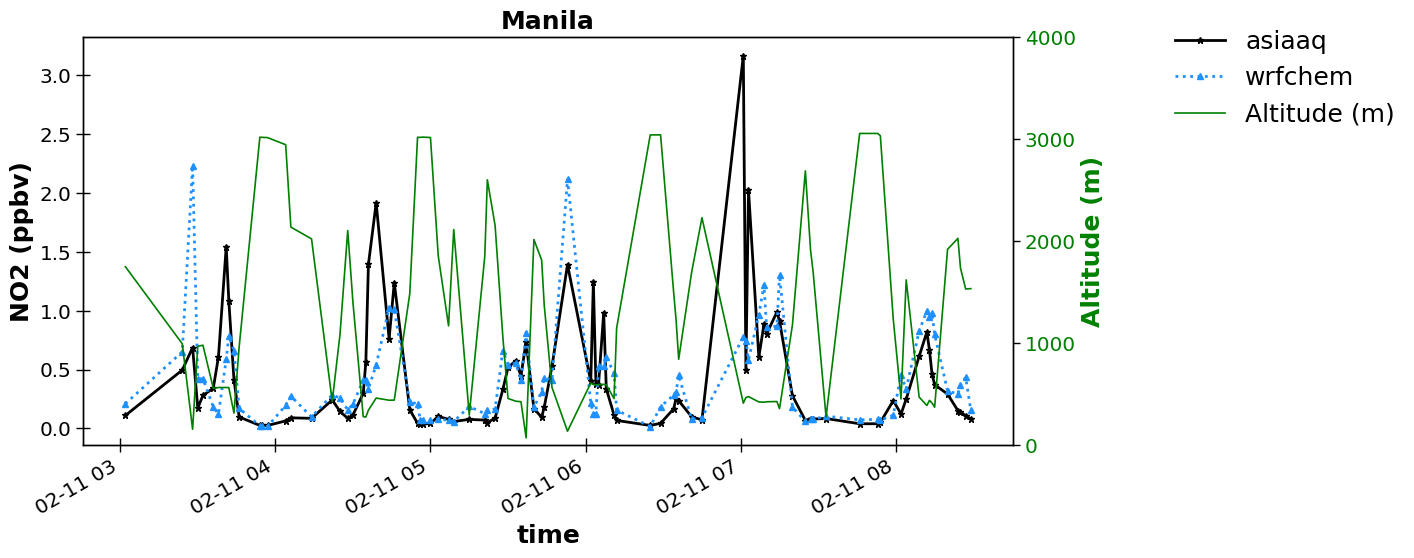

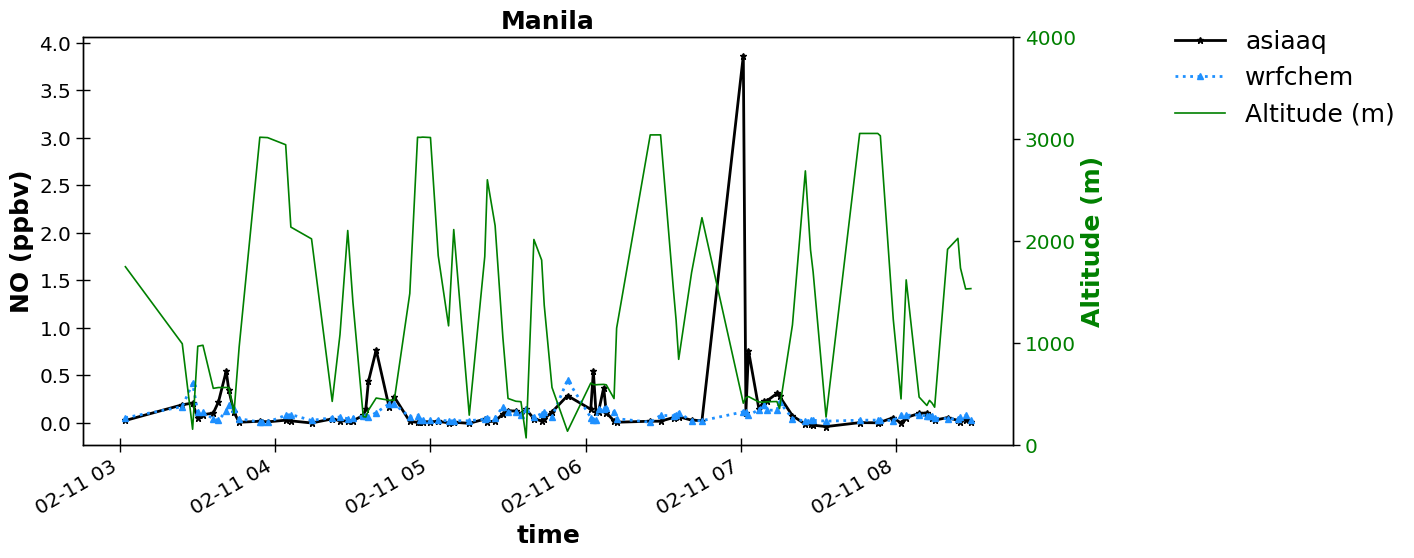

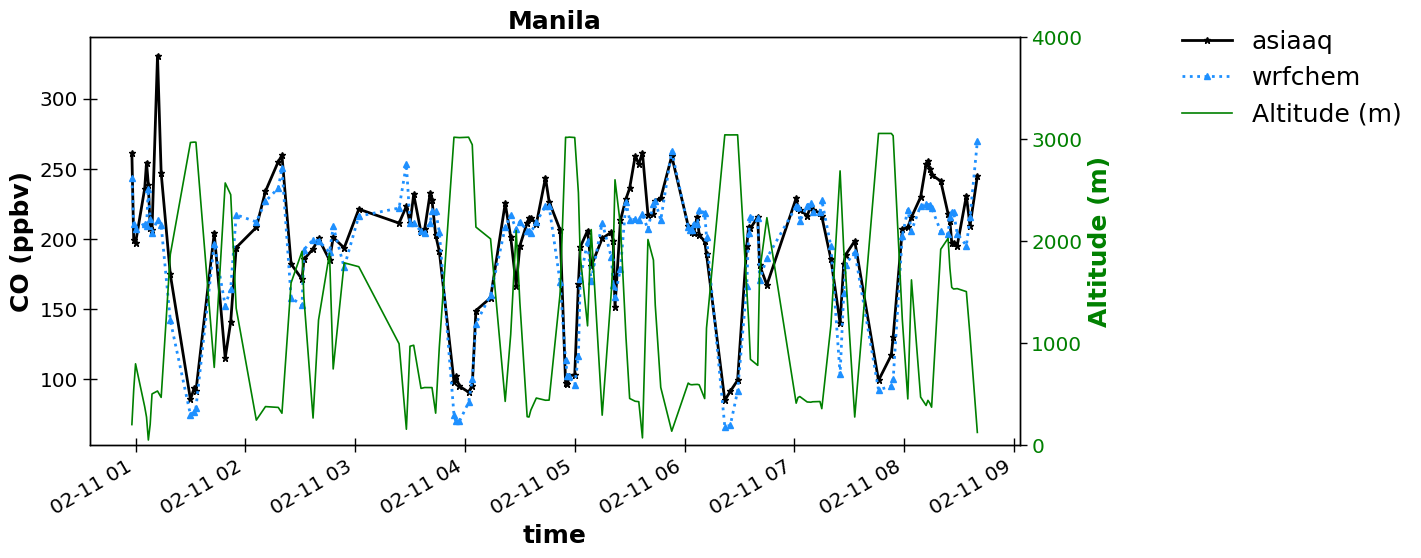

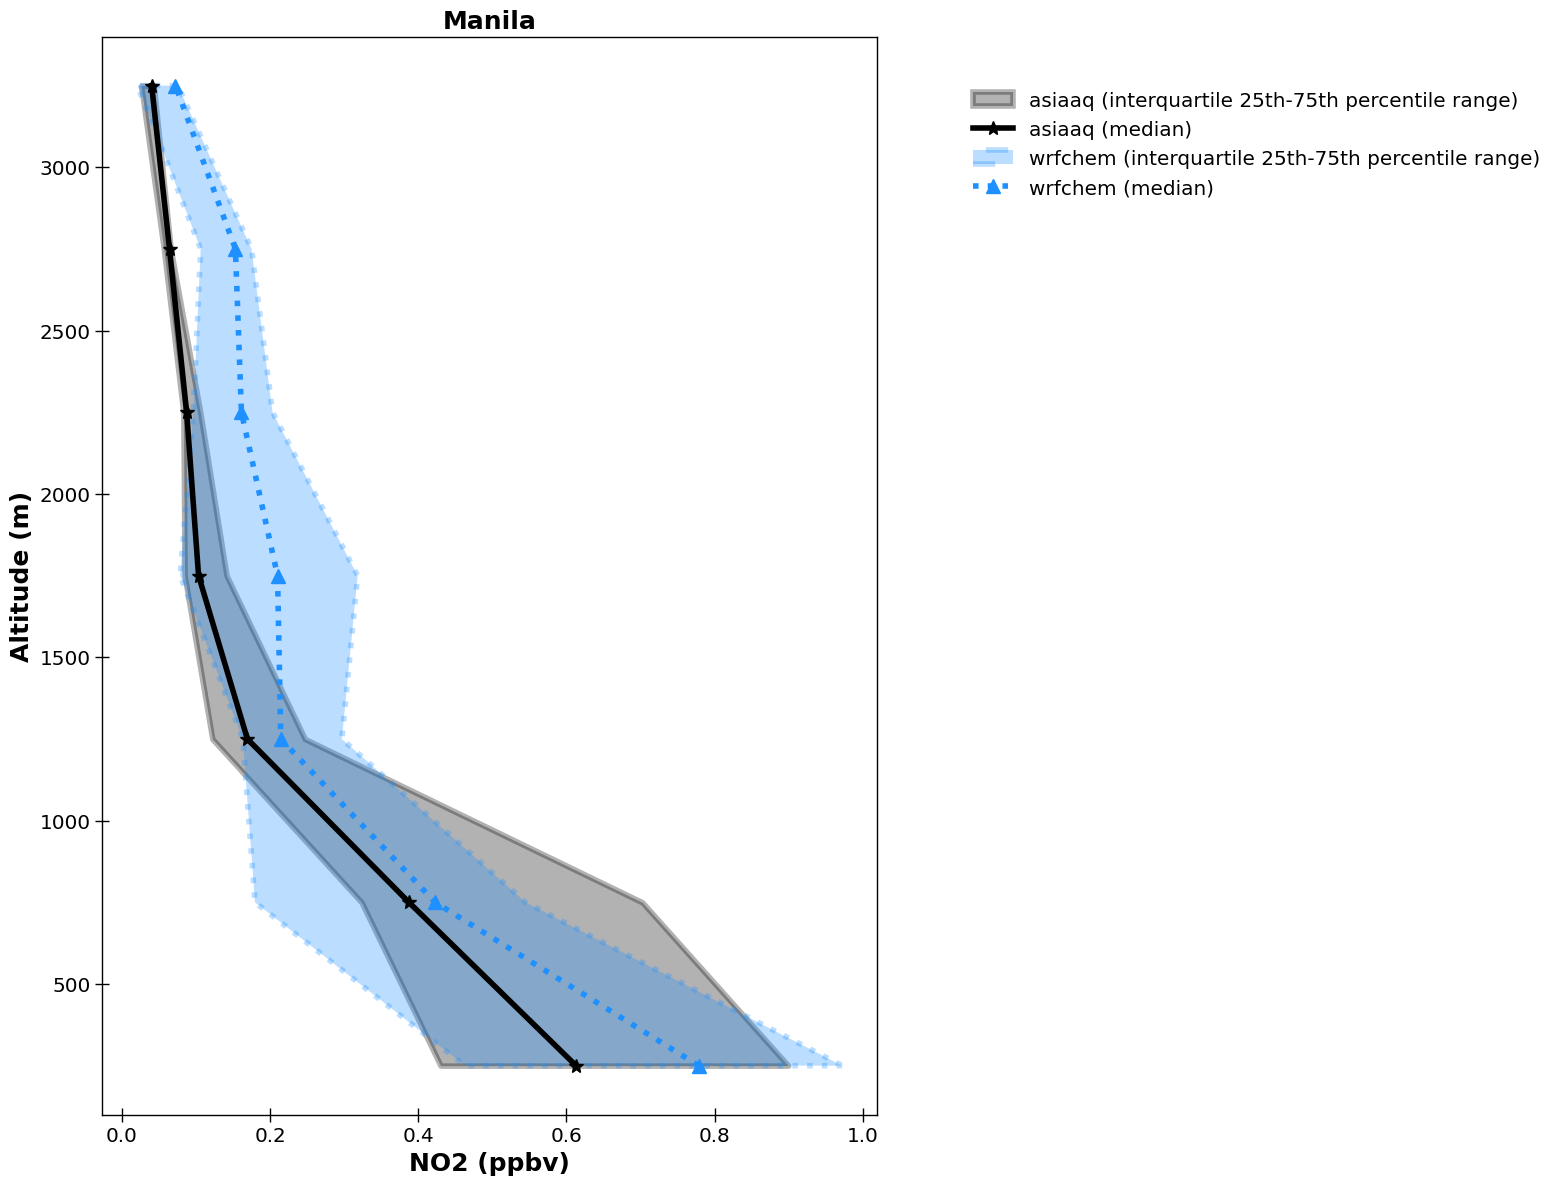

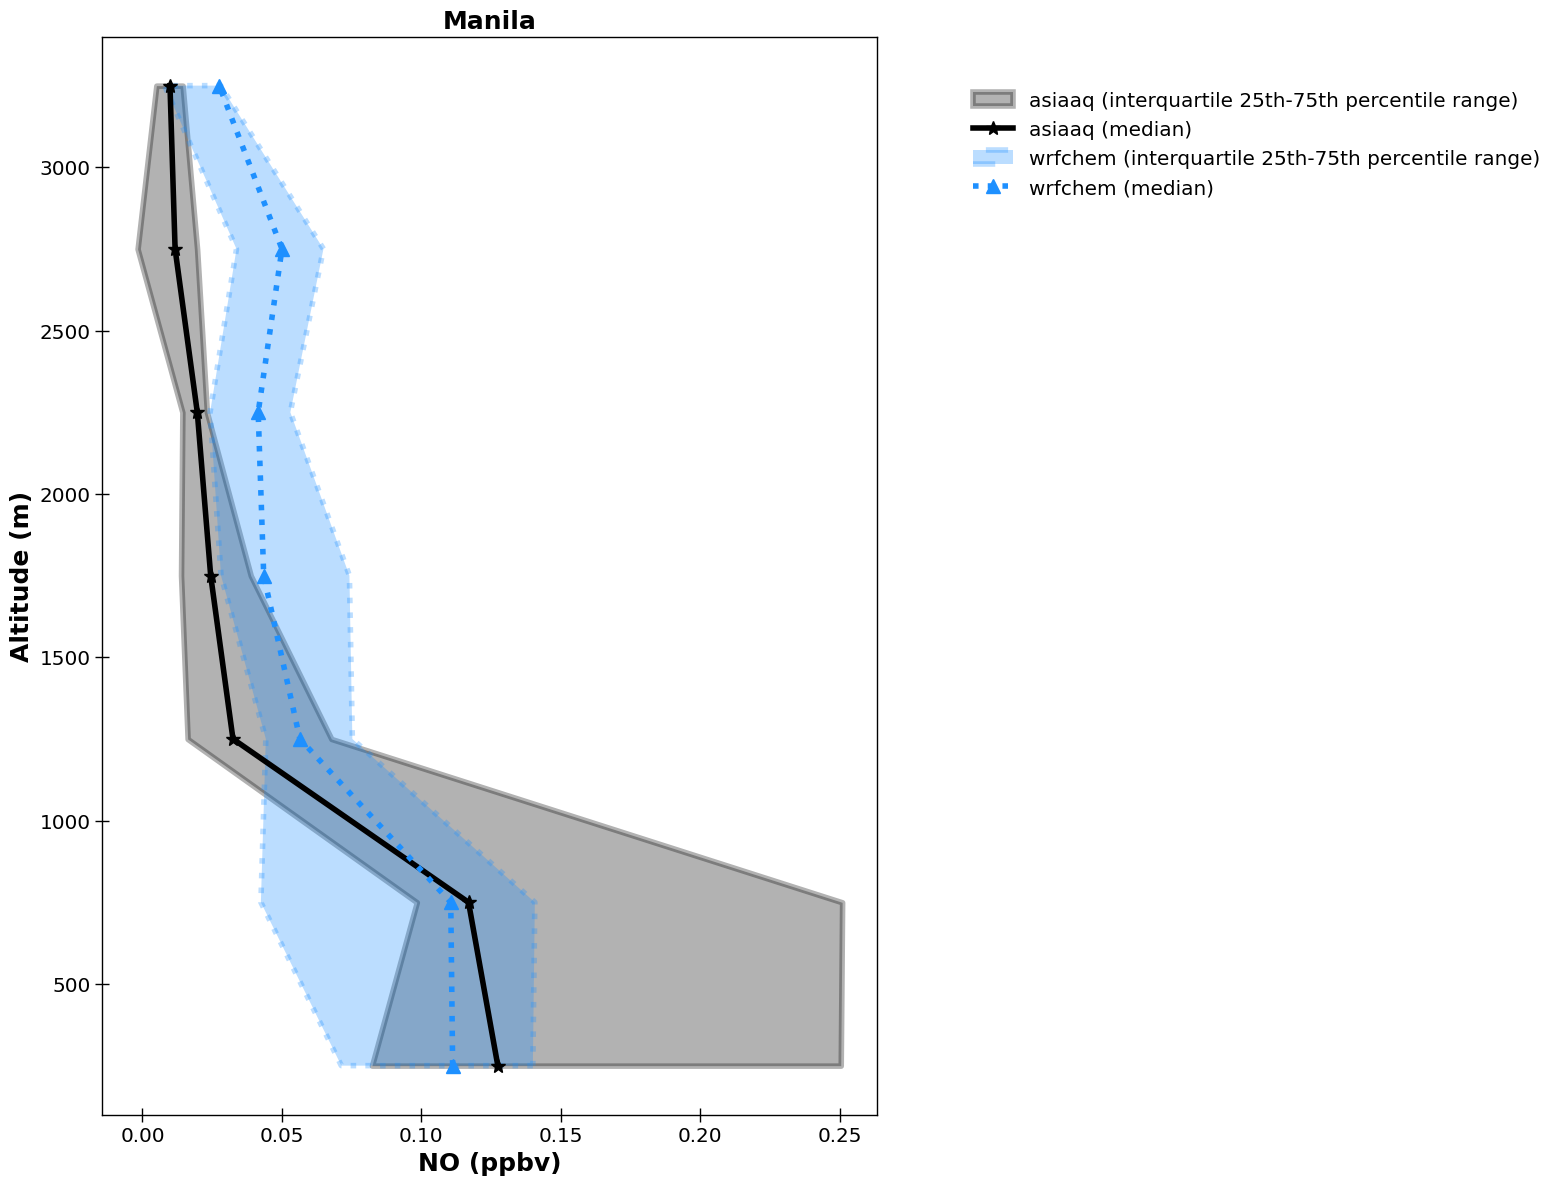

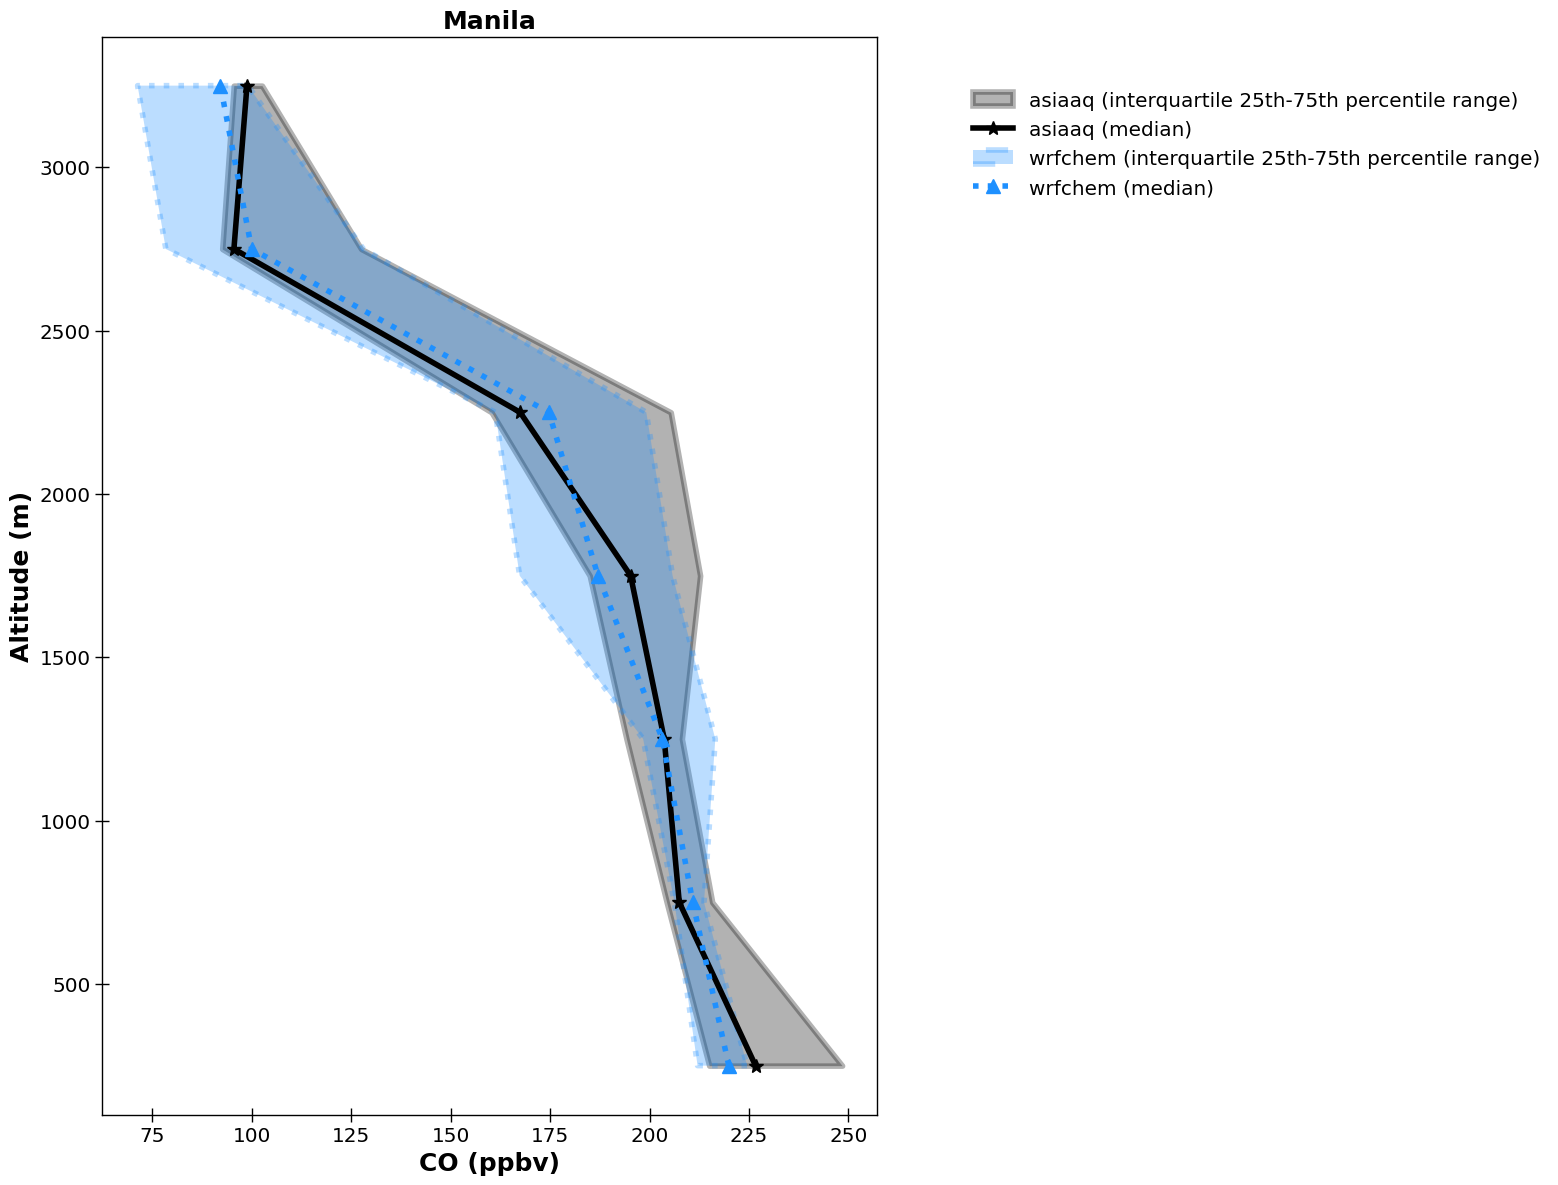

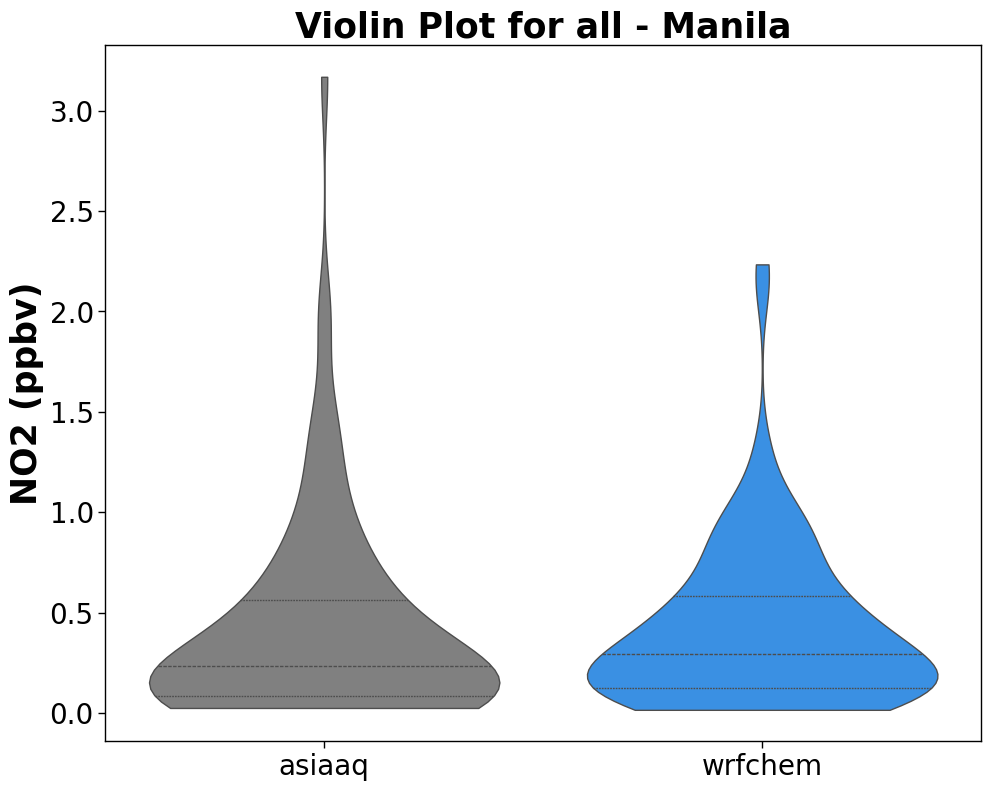

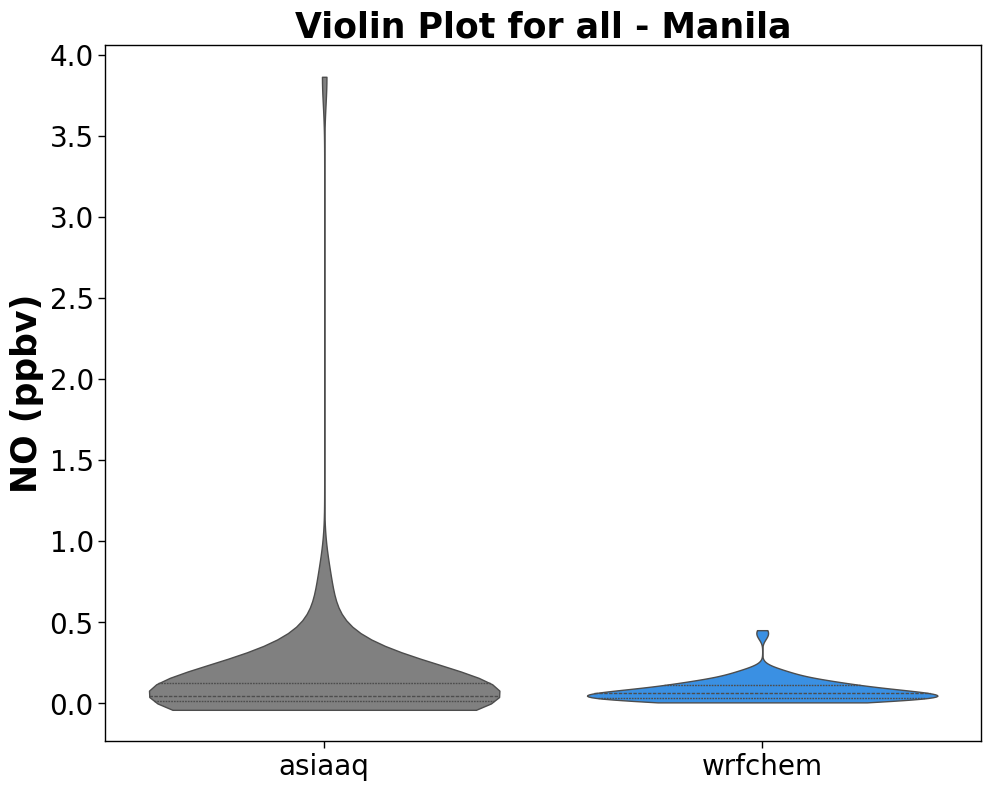

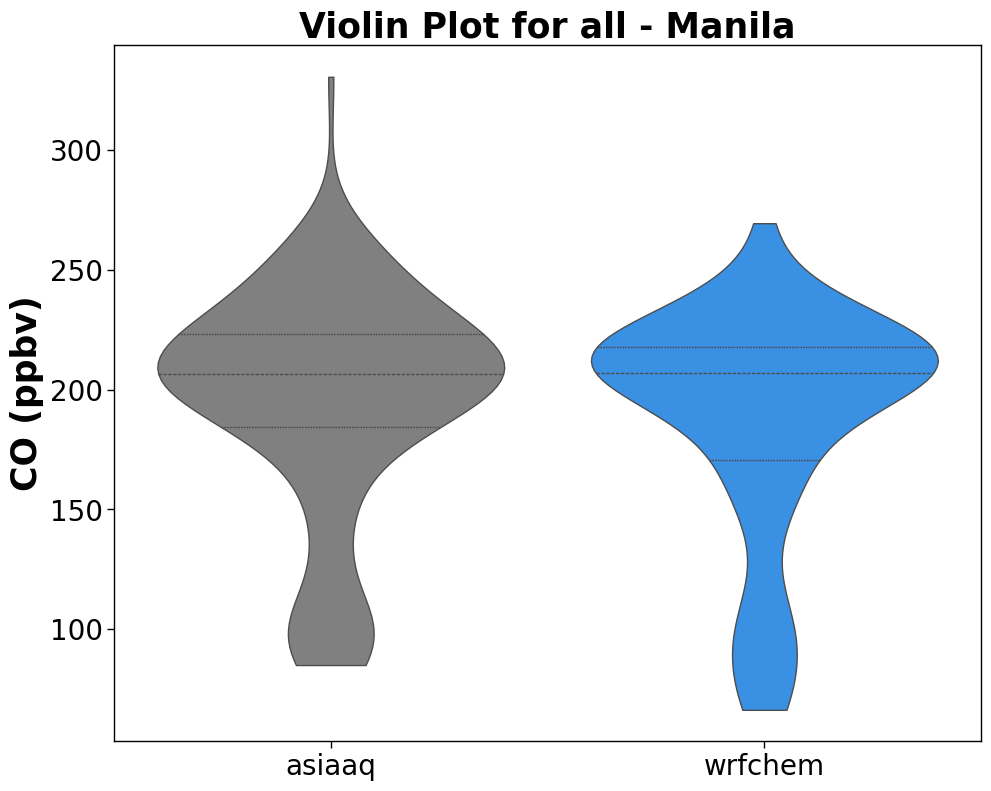

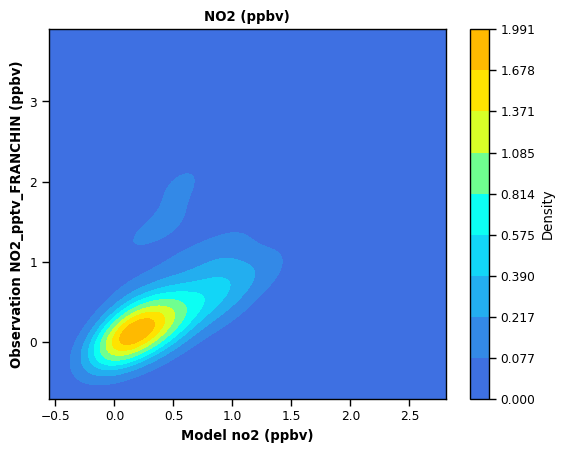

Value of fill after reading from scatter_density_config: True
Saving scatter density plot to /glade/work/emmons/MM_tutorial_24/plots_asiaaq/plot_grp4.scatter_density.NO_pptv_FRANCHIN.2024-02-11_00.2024-02-11_23.all.Philippines_asiaaq_vs_wrfchem.png...
Processing scatter density plot for model 'wrfchem' and observation 'asiaaq'...
Saving scatter density plot to /glade/work/emmons/MM_tutorial_24/plots_asiaaq/plot_grp4.scatter_density.NO_pptv_FRANCHIN.2024-02-11_00.2024-02-11_23.all.Philippines_asiaaq_vs_wrfchem.png...


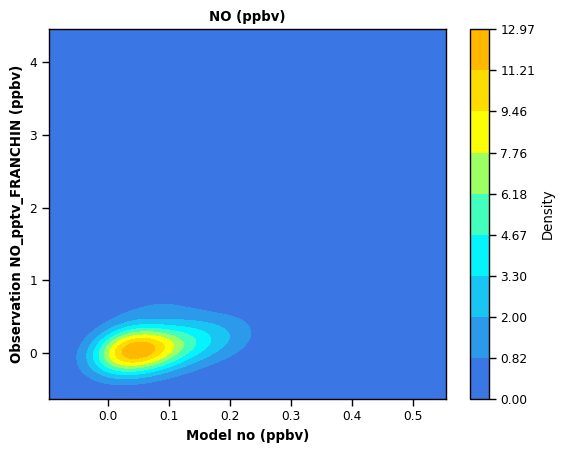

Value of fill after reading from scatter_density_config: True
Saving scatter density plot to /glade/work/emmons/MM_tutorial_24/plots_asiaaq/plot_grp4.scatter_density.CO_DACOM_DISKIN.2024-02-11_00.2024-02-11_23.all.Philippines_asiaaq_vs_wrfchem.png...
Processing scatter density plot for model 'wrfchem' and observation 'asiaaq'...
Saving scatter density plot to /glade/work/emmons/MM_tutorial_24/plots_asiaaq/plot_grp4.scatter_density.CO_DACOM_DISKIN.2024-02-11_00.2024-02-11_23.all.Philippines_asiaaq_vs_wrfchem.png...


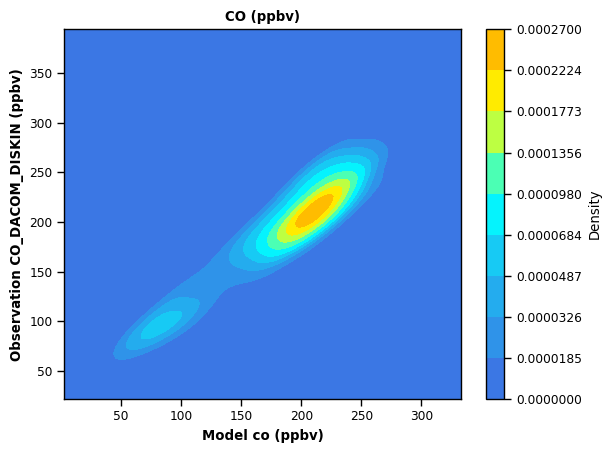

Reference std: 0.5184849523976466
Reference std: 0.41850960442605084
Reference std: 47.625802487163774


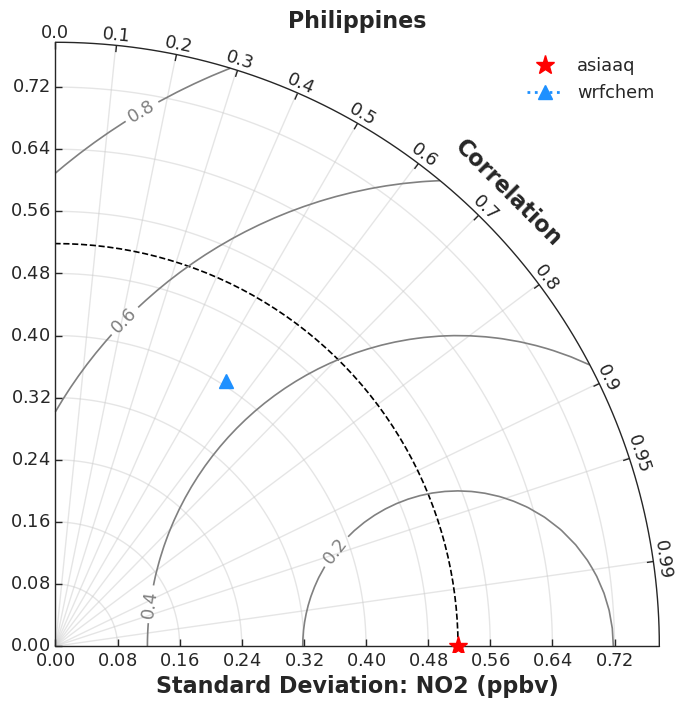

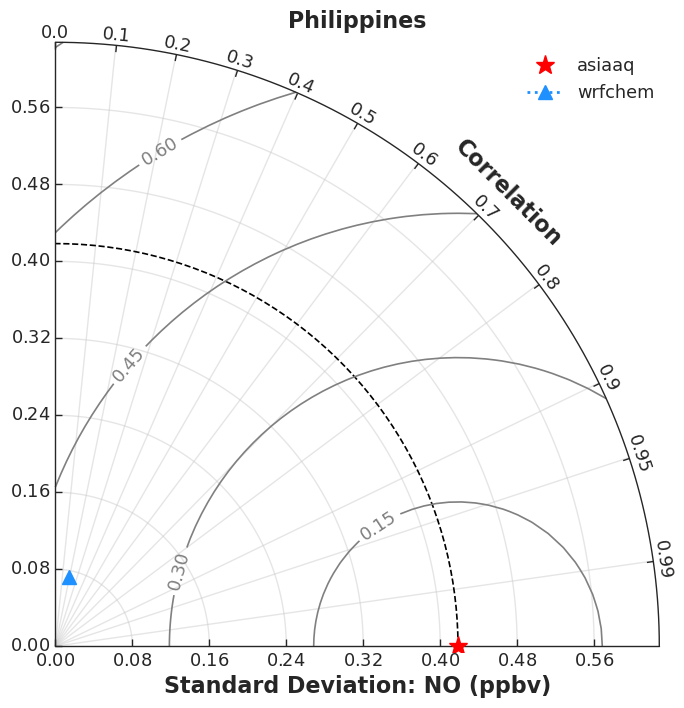

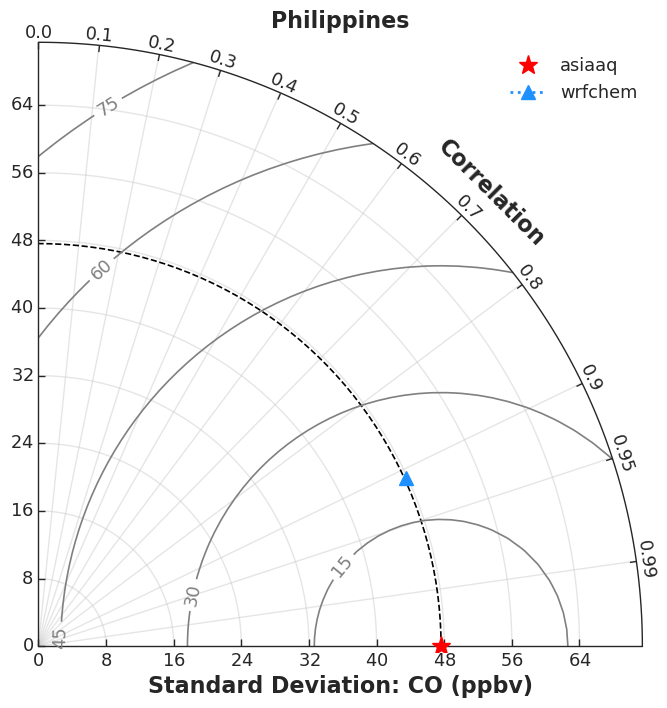

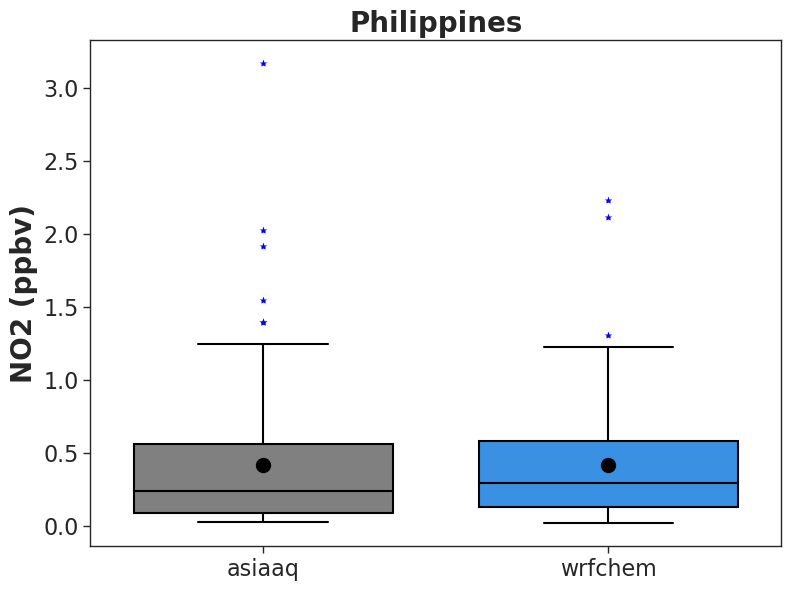

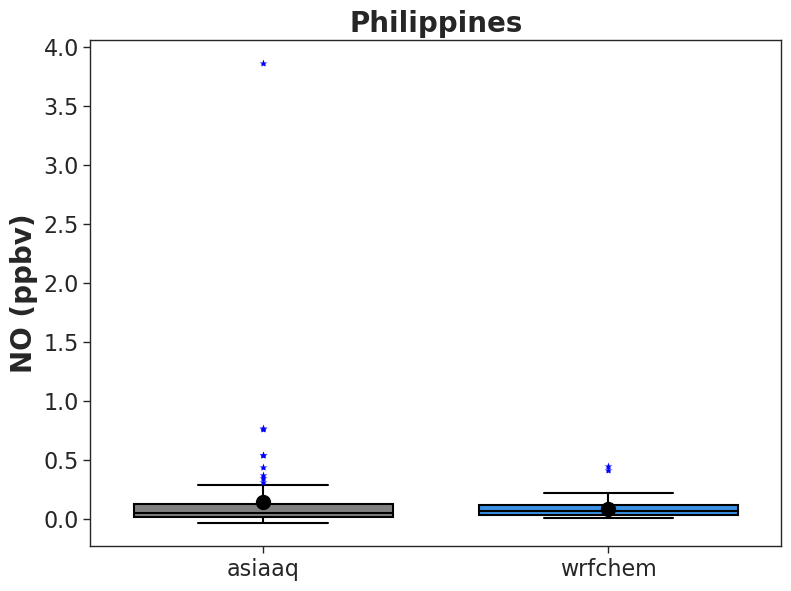

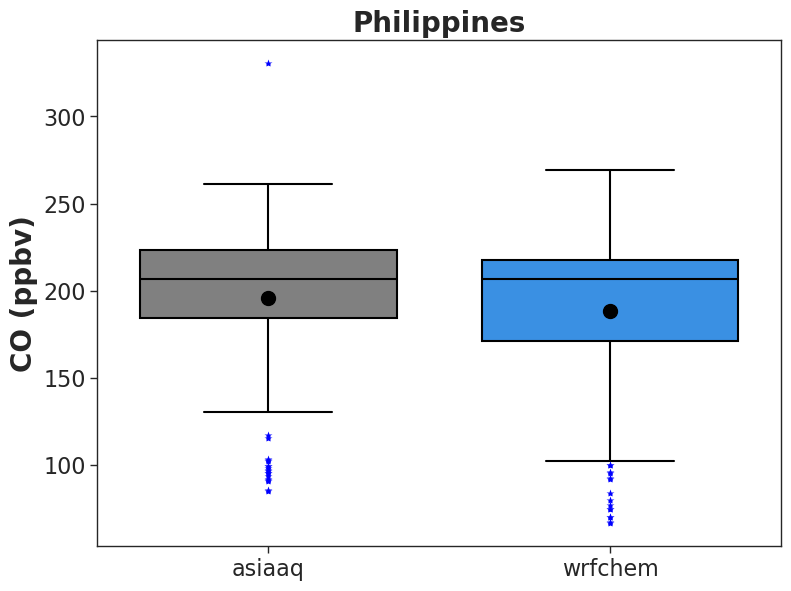

In [13]:
#And this generates all the plots.
an.plotting()